In [2]:
# install necessary packages
!pip install numpy scipy dataclasses plotly pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# a) clone from github repo directly
!git clone https://github.com/location-competition/indoor-location-competition-20
!mv ./indoor-location-competition-20/* ./

Cloning into 'indoor-location-competition-20'...
remote: Enumerating objects: 1181, done.
remote: Total 1181 (delta 0), reused 0 (delta 0), pack-reused 1181
Receiving objects: 100% (1181/1181), 411.37 MiB | 19.51 MiB/s, done.
Resolving deltas: 100% (45/45), done.
Checking out files: 100% (1145/1145), done.


In [4]:
import sys
import numpy as np
import os
import json
import matplotlib.image as im
import matplotlib.pyplot as plt
from matplotlib import ticker

In [5]:
# import functions
from io_f import *
from compute_f import *
from main import *
from visualize_f import *

In [6]:
def draw_heatmap(magn_image_save_dir, position, value, floor_plan_filename, width_meter, height_meter, colorbar_title="colorbar", title=None, show=False):
    fig, ax = plt.subplots()
    plt.title(title)
    plt.scatter(x=position[:, 0], y=position[:, 1], c=value, cmap='gist_rainbow_r', s=10)

    floor_plan = plt.imread(floor_plan_filename)
    ax.imshow(floor_plan, extent=(0, width_meter, 0, height_meter))
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(40))

    plt.colorbar(label=colorbar_title, orientation='horizontal')

    # Save the image
    image_filename = f'{magn_image_save_dir}/magnetic_strength'
    image_filename = str(Path(image_filename).resolve())
    plt.savefig(image_filename,format='PNG',dpi=600)

    # Must show after saving, or saved pictures would be blank
    if show:
        fig.show()

    # return fig



In [7]:
def vis_magmetic(site,floor):
    # Save Path
    magn_image_save_dir = f'./output/{site}/{floor}'
    Path(magn_image_save_dir).mkdir(parents=True, exist_ok=True)

    # Read Path
    floor_data_dir = f'./data/{site}/{floor}'
    path_data_dir = floor_data_dir + '/path_data_files'
    floor_plan_filename = floor_data_dir + '/floor_image.png'
    floor_info_filename = floor_data_dir + '/floor_info.json'
    with open(floor_info_filename) as f:
        floor_info = json.load(f)
    width_meter = floor_info["map_info"]["width"]
    height_meter = floor_info["map_info"]["height"]
    path_filenames = list(Path(path_data_dir).resolve().glob("*.txt"))

    # Calculate Magnetic Strength at every point, and put the result into dict
    datas = calibrate_magnetic_wifi_ibeacon_to_position(path_filenames)
    magnetic_strength = {}
    for position_key in datas.keys():
        magnetic_data = datas[position_key]['magnetic']
        strength = np.mean(np.sqrt(np.sum(magnetic_data[:, 1:4] ** 2, axis=1)))
        magnetic_strength[position_key] = strength

    # Visualize
    heat_positions = np.array(list(magnetic_strength.keys()))
    heat_values = np.array(list(magnetic_strength.values()))
    draw_heatmap(magn_image_save_dir, heat_positions, heat_values, floor_plan_filename, width_meter, height_meter, colorbar_title='mu tesla', title='Magnetic Strength', show=True)

    print("Finish Visualizing Geomagmetic Heatmap of ",site, " ", floor)


Processing /content/data/site1/B1/path_data_files/5ddb8ebc9191710006b5762a.txt...
Processing /content/data/site1/B1/path_data_files/5dda3342c5b77e0006b17646.txt...
Processing /content/data/site1/B1/path_data_files/5dda331d9191710006b57314.txt...
Processing /content/data/site1/B1/path_data_files/5dda331fc5b77e0006b1762b.txt...
Processing /content/data/site1/B1/path_data_files/5dda387ac5b77e0006b1768a.txt...
Processing /content/data/site1/B1/path_data_files/5dda3343c5b77e0006b17648.txt...
Processing /content/data/site1/B1/path_data_files/5ddb930c9191710006b57643.txt...
Processing /content/data/site1/B1/path_data_files/5dda3323c5b77e0006b1762f.txt...
Processing /content/data/site1/B1/path_data_files/5dda33349191710006b57324.txt...
Processing /content/data/site1/B1/path_data_files/5ddb930e9191710006b57645.txt...
Processing /content/data/site1/B1/path_data_files/5dda25909191710006b572bd.txt...
Processing /content/data/site1/B1/path_data_files/5dda25999191710006b572c3.txt...
Processing /cont

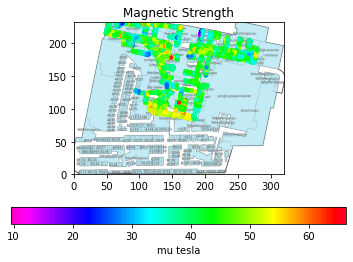

In [15]:
vis_magmetic('site1', 'B1')

Processing /content/data/site1/B1/path_data_files/5ddb8ebc9191710006b5762a.txt...
Processing /content/data/site1/B1/path_data_files/5dda3342c5b77e0006b17646.txt...
Processing /content/data/site1/B1/path_data_files/5dda331d9191710006b57314.txt...
Processing /content/data/site1/B1/path_data_files/5dda331fc5b77e0006b1762b.txt...
Processing /content/data/site1/B1/path_data_files/5dda387ac5b77e0006b1768a.txt...
Processing /content/data/site1/B1/path_data_files/5dda3343c5b77e0006b17648.txt...
Processing /content/data/site1/B1/path_data_files/5ddb930c9191710006b57643.txt...
Processing /content/data/site1/B1/path_data_files/5dda3323c5b77e0006b1762f.txt...
Processing /content/data/site1/B1/path_data_files/5dda33349191710006b57324.txt...
Processing /content/data/site1/B1/path_data_files/5ddb930e9191710006b57645.txt...
Processing /content/data/site1/B1/path_data_files/5dda25909191710006b572bd.txt...
Processing /content/data/site1/B1/path_data_files/5dda25999191710006b572c3.txt...
Processing /cont

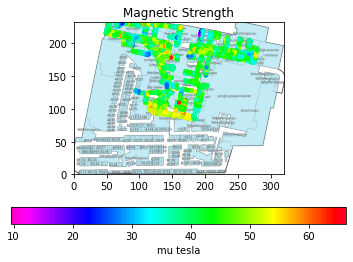

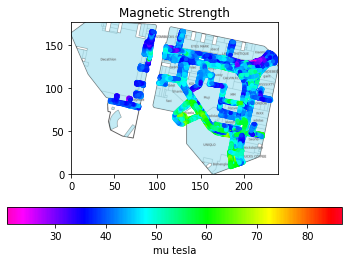

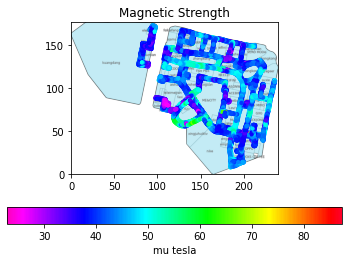

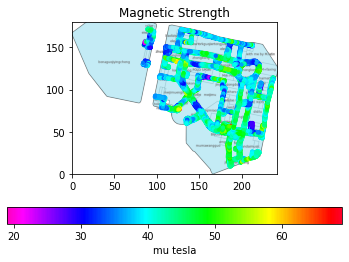

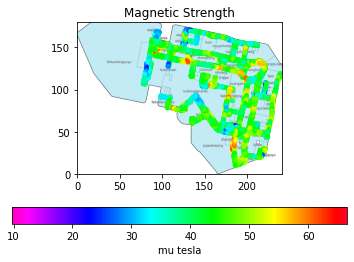

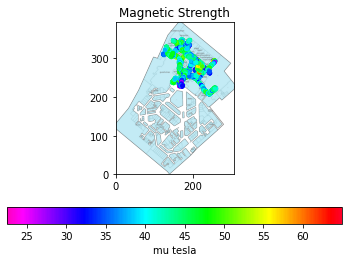

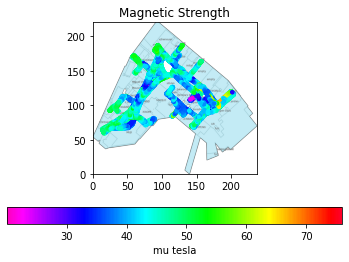

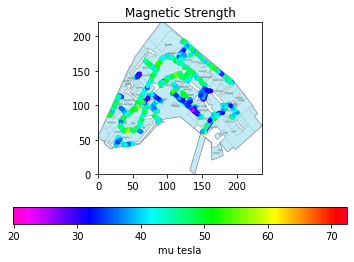

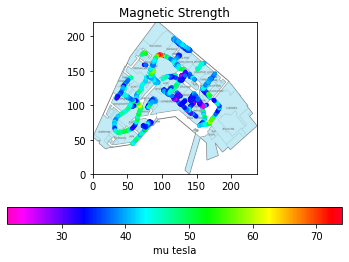

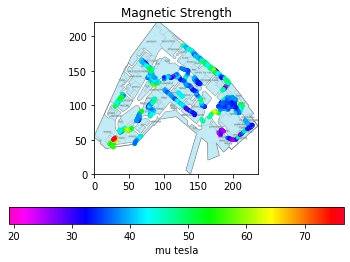

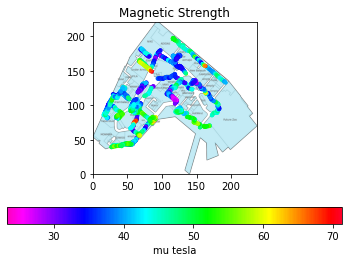

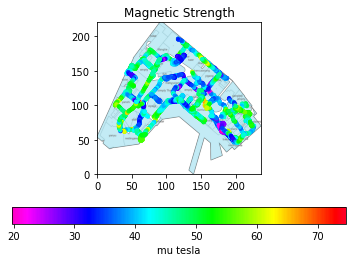

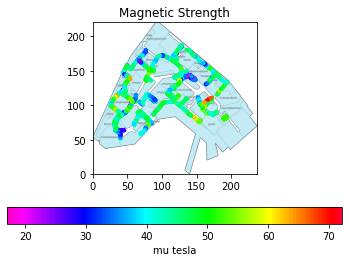

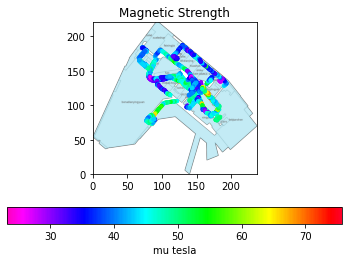

In [8]:
sites = ['site1','site2']
floor1 = ['B1','F1','F2','F3','F4']
floor2 = ['B1','F1','F2','F3','F4','F5','F6','F7','F8']
for site in sites:
    if site == 'site1':
        for floor in floor1:
            vis_magmetic(site,floor)
    elif site == 'site2':
        for floor in floor2:
            vis_magmetic(site,floor)
    else:
        break

In [10]:
from google.colab import files
files.download('/content/output')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>